# Prepare a model for glass classification using KNN
---

## Data Description

Feature | Description
:-: | :-:
RI | Refractive Index
Na | Sodium (percent weight)
Mg | Magnesium (percent weight)
AI | Aluminum (percent weight)
Si | Silicon (percent weight)
K | Potassium (percent weight)
Ca | Calcium (percent weight)
Ba | Barium (percent weight)
Fe | Iron (percent weight)

Target Class | Class Attribute
:-: | :-:
1 | Building Windows (float processed)
2 | Building Windows (non-float processed)
3 | Vehicle Windows (float processed)
4 | Vehicle Windows (non-float processed) ('none' in this database)
5 | Containers
6 | Tableware
7 | Headlamps

## Data Gathering

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Loading the data
df = pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Exploration

In [12]:
# Getting info on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


214 entries

In [13]:
# Checking for na values
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No na values

In [14]:
# Checking for duplicated entries
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


One entry has been duplicated. We will delete this entry

In [16]:
# Deleting the duplicate entry
df.drop(index = df[df.duplicated()].index, inplace=True)

In [18]:
# Resetting index now that an entry has been deleted
df.reset_index(drop=True, inplace=True)

<Axes: xlabel='RI', ylabel='Count'>

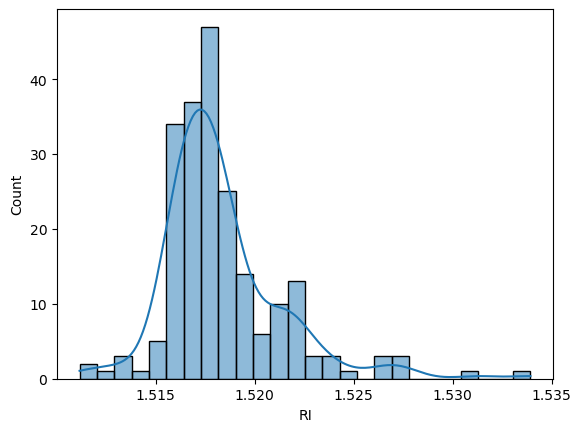

In [22]:
# Histogram for 'RI'
sns.histplot(df, x = 'RI', kde = True)

<Axes: xlabel='Na', ylabel='Count'>

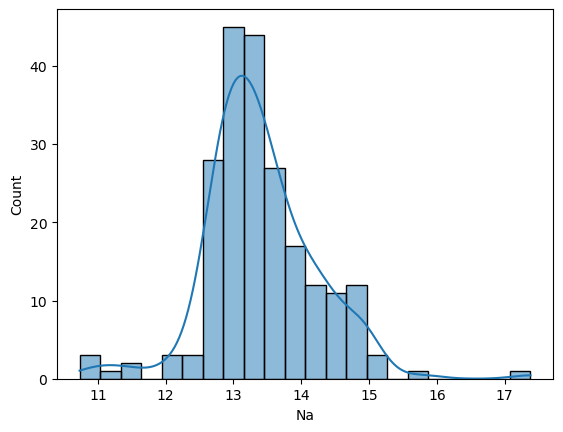

In [24]:
# Histogram for 'Na'
sns.histplot(df, x = 'Na', kde = True)

<Axes: xlabel='Mg', ylabel='Count'>

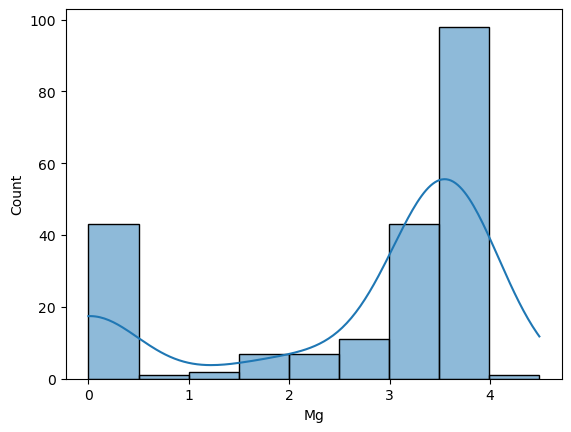

In [25]:
# Histogram for 'Mg'
sns.histplot(df, x = 'Mg', kde = True)

<Axes: xlabel='Al', ylabel='Count'>

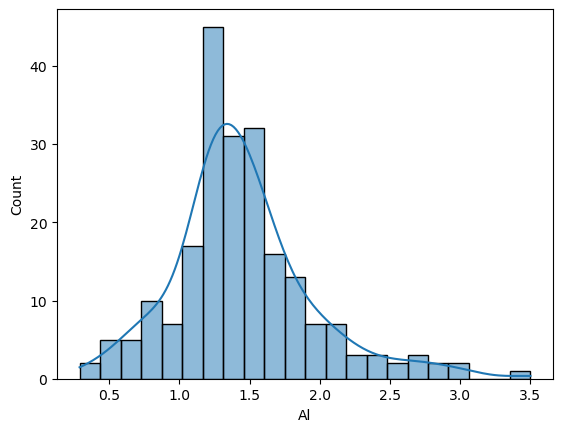

In [26]:
# Histogram for 'Al'
sns.histplot(df, x = 'Al', kde = True)

<Axes: xlabel='Si', ylabel='Count'>

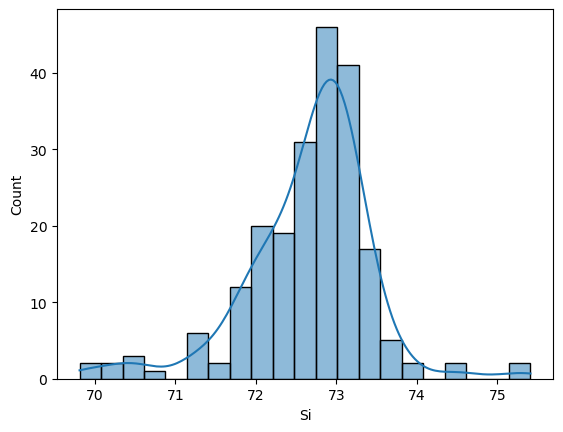

In [27]:
# Histogram for 'Si'
sns.histplot(df, x = 'Si', kde = True)

<Axes: xlabel='K', ylabel='Count'>

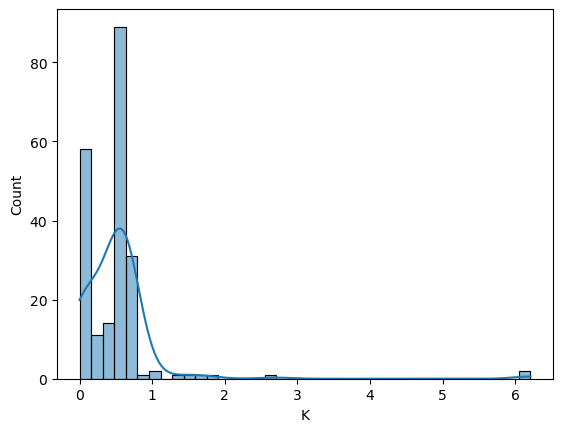

In [28]:
# Histogram for 'K'
sns.histplot(df, x = 'K', kde = True)

<Axes: xlabel='Ca', ylabel='Count'>

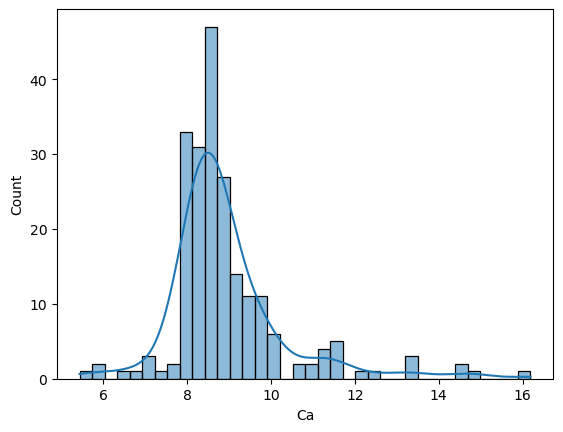

In [29]:
# Histogram for 'Ca'
sns.histplot(df, x = 'Ca', kde = True)

<Axes: xlabel='Ba', ylabel='Count'>

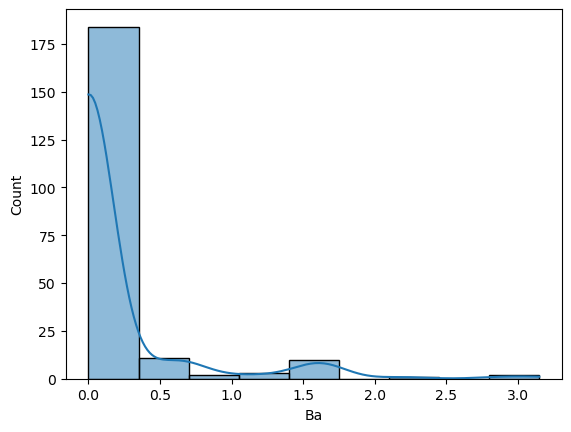

In [30]:
# Histogram for 'Ba'
sns.histplot(df, x = 'Ba', kde = True)

<Axes: xlabel='Fe', ylabel='Count'>

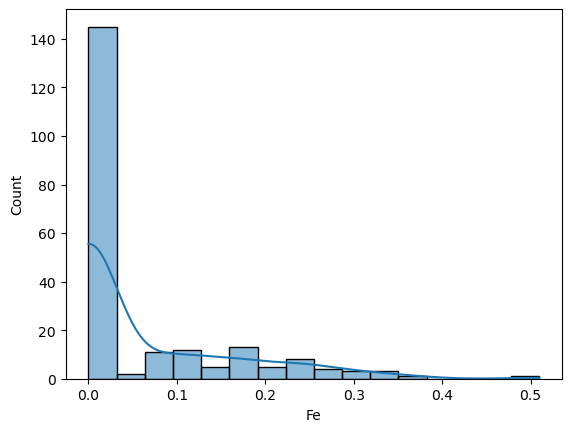

In [31]:
# Histogram for 'Fe'
sns.histplot(df, x = 'Fe', kde = True)

All features have different ranges and some features are somewhat normal

<Axes: xlabel='Type', ylabel='count'>

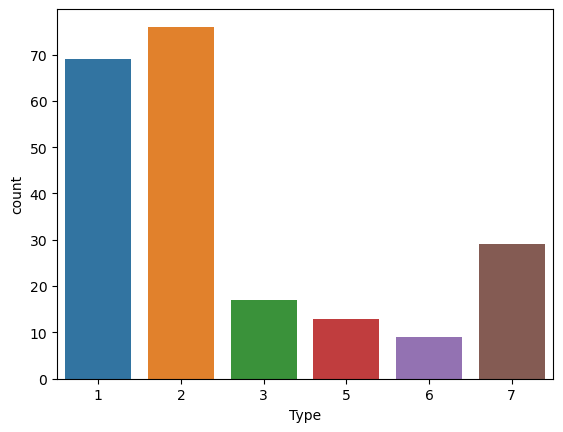

In [35]:
# Countplot for target variable 'Type'
sns.countplot(df, x = 'Type')

In [40]:
# Getting unique values for each feature
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

## Hyperparameter Tuning

In [37]:
# Importing required classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [38]:
# Creating a knn classifier model object
knnc = KNeighborsClassifier()

In [43]:
# Defining range of k values
k = [i for i in range(1,51)]

# Creating a dictionary for hyperparameter values
param_grid = {
    'n_neighbors' : k,
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2]
}

In [41]:
# Creating a stratified k fold cross validator object
skf_cv = StratifiedKFold()

In [44]:
# Creating a grid search cross validator
grid = GridSearchCV(estimator = knnc, param_grid = param_grid, cv = skf_cv)

In [46]:
# Splitting dataset into independent and dependent variables
X = df.drop(columns=['Type'])
y = df.Type

In [47]:
# Fitting data for hyperparameter tuning
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [48]:
# Best score obtained
grid.best_score_

0.6529346622369878

In [49]:
# Hyperparameters that gave the best score
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

The score is quite low. Let us try again with normalized data

In [50]:
# Importing Class to normalize data
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Normalizing independent variables
X_norm = MinMaxScaler().fit_transform(X)

In [53]:
# Fitting grid search to normalized data
grid.fit(X_norm, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [54]:
# Getting best score for normalized data
grid.best_score_

0.6852713178294574

In [55]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

We've had a 3% improvement for normalized data. Let us see the effects on standardized data

In [56]:
# Importing Class to normalize data
from sklearn.preprocessing import StandardScaler

In [57]:
# Normalizing independent variables
X_std = StandardScaler().fit_transform(X)

In [58]:
# Fitting grid search to standardized data
grid.fit(X_std, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [59]:
# Getting best score for standardized data
grid.best_score_

0.6901439645625692

In [60]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Standardized data give slightly better performance than normalized data

All three grid searches suggest the default hyperparameter for algorithm, and 'distance' for weights, 1 for p (i.e. using Manhattan Distance as the metric), and k around 5, 6, 7

## Model Training and Testing

In [64]:
# Importing train test split
from sklearn.model_selection import train_test_split

In [65]:
# Splitting standardized data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify= y)

In [88]:
# Creating a knn classifier with optimal hyperparameters
knnc = KNeighborsClassifier(n_neighbors=5 , p = 1, weights = 'distance')

In [89]:
# Fitting to training data
knnc.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [90]:
# Accuracy for training data
knnc.score(X_train,y_train)

1.0

In [91]:
# Accuracy for test data
knnc.score(X_test, y_test)

0.6851851851851852

The model is overfit to the training data, but we have found the optimal k value through cross validation

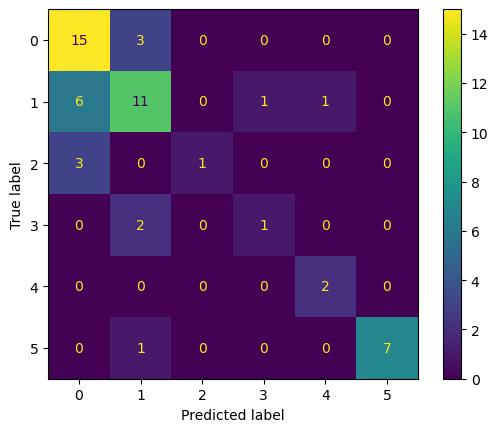

In [93]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knnc.predict(X_test))).plot()

We can see that there is a lot of misclassification to labels 0 and 1. The target variable has a high value count for these two labels and hence, the model is overfitting for these labels. We can reduce overfitting by reducing model complexity by removing unimportant features or by using dimensionality reduction.

## Conclusion

KNN Classifier does not perform well on this dataset as it overfits to the training data.